In [1]:
%reset -f
from ROOT import *
from include import RootHelper, Helper
from array import array

#%jsroot on


Welcome to JupyROOT 6.26/06


In [2]:
ttbarFile = TFile.Open("mc_410000.ttbar_lep.exactly2lep.filtered.root","READ")
ttbarTree = ttbarFile.Get("mini")

entries=ttbarTree.GetEntries()
print("from file %s read tree %s with entries %d" %(ttbarFile.GetName(),ttbarTree.GetName(),entries))

histos = {}
histos["leading_lep_pt"] = TH1F("leading_lep_pt","Leading Lepton p_{T} ; Lepton p_{T} [GeV] ; Entries", 150 , 0, 200)
histos["leading_jet_pt"] = TH1F("leading_jet_pt","Leading Jet p_{T} ; Jet p_{T} [GeV] ; Entries", 150 , 50, 200)
histos["Jet_vs_Lep_pt"] = TH2F("Jet_vs_Lep_pt"," Jet p_{T} vs Lep p_{T} ; Jet p_{T} [GeV] ; Lep p_{T} [GeV]", 150 , 0, 200, 150 , 0, 200)


from file mc_410000.ttbar_lep.exactly2lep.filtered.root read tree mini with entries 100000


In [3]:
outfile = TFile.Open("NewTree.root","RECREATE")
outtree = TTree("newmini","newmini")
outtree.SetDirectory(outfile)


lead_jet_pt = array('f', [0.])
lead_jet_trueflav = array('f', [0.])
lead_lep_pt = array('f', [0.])
lead_lep_type = array('f', [0.])

outtree.Branch("lead_jet_pt",lead_jet_pt,"lead_jet_pt/F")
outtree.Branch("lead_jet_trueflav",lead_jet_trueflav,"lead_jet_trueflav/F")
outtree.Branch("lead_lep_pt",lead_lep_pt,"lead_lep_pt/F")
outtree.Branch("lead_lep_type",lead_lep_type,"lead_lep_type/F")


In [4]:

entry =0

for e in ttbarTree:
    jet_pt=[]
    lep_pt=[]
    w=e.mcWeight
    entry+=1
    # if(entry>1e5):
    #     break
    if((entry%5000)==0):
        print("reading entry %d out of %d" % (entry,entries))
    if len(e.jet_pt)==0: continue
    for iJet in range(0,len(e.jet_pt)):
        jet_pt.append(e.jet_pt[iJet])
    for iLep in range(0,len(e.lep_pt)):
        lep_pt.append(e.lep_pt[iLep])

    if(max(jet_pt)<50000): continue  #cut on 50 GeV jet
    iLeadJet = jet_pt.index(max(jet_pt))
    iLeadLep = lep_pt.index(max(lep_pt))
    if(e.lep_isTightID[iLeadLep]==False): continue #cut on isTightID jet
    
    histos["leading_lep_pt"].Fill(e.lep_pt[iLeadLep]/1000.,w)
    histos["leading_jet_pt"].Fill(e.jet_pt[iLeadJet]/1000.,w)
    histos["Jet_vs_Lep_pt"].Fill(e.jet_pt[iLeadJet]/1000.,e.lep_pt[iLeadLep]/1000.)

    lead_jet_pt[0]= e.jet_pt[iLeadJet]/1000.
    lead_jet_trueflav[0] = e.jet_trueflav[iLeadJet]
    lead_lep_pt[0] = e.lep_pt[iLeadLep]/1000.
    lead_lep_type[0] = e.lep_type[iLeadLep]

    outtree.Fill()


    #print(f"{jet_pt.index(max(jet_pt))} {max(jet_pt)}")
outfile.Close()


reading entry 5000 out of 100000
reading entry 10000 out of 100000
reading entry 15000 out of 100000
reading entry 20000 out of 100000
reading entry 25000 out of 100000
reading entry 30000 out of 100000
reading entry 35000 out of 100000
reading entry 40000 out of 100000
reading entry 45000 out of 100000
reading entry 50000 out of 100000
reading entry 55000 out of 100000
reading entry 60000 out of 100000
reading entry 65000 out of 100000
reading entry 70000 out of 100000
reading entry 75000 out of 100000
reading entry 80000 out of 100000
reading entry 85000 out of 100000
reading entry 90000 out of 100000
reading entry 95000 out of 100000
reading entry 100000 out of 100000


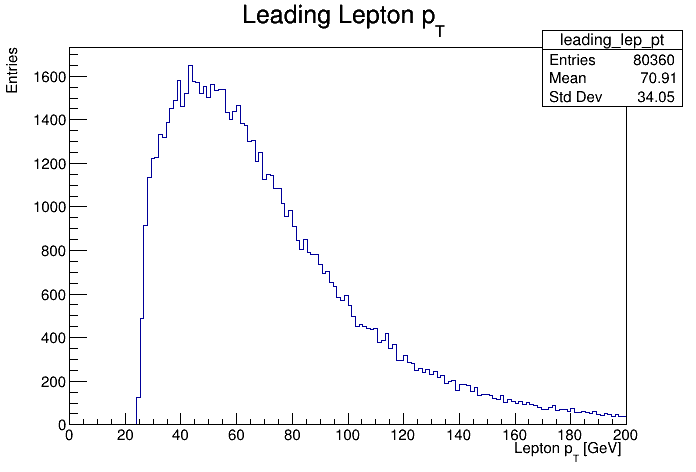

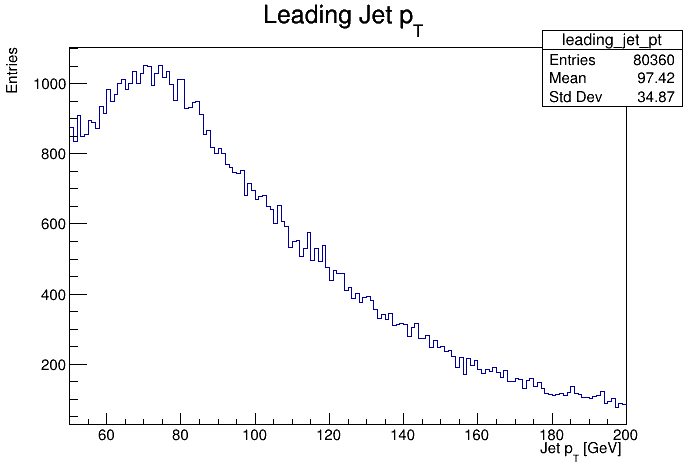

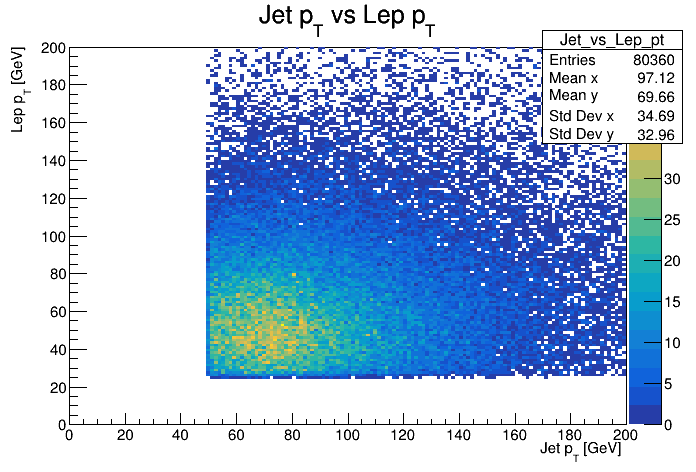

In [5]:
cc = TCanvas()
cc.Draw()
histos["leading_lep_pt"].Draw()

cc1 = TCanvas()
cc1.Draw()
histos["leading_jet_pt"].Draw()

cc2 = TCanvas()
cc2.Draw()
histos["Jet_vs_Lep_pt"].Draw("zcol")


In [6]:


entry =0
txtfile = open("efficiency.txt",'w')

for e in ttbarTree:
    entry+=1
    # if(entry>1e5):
    #     break
    if((entry%5000)==0):
        print("reading entry %d out of %d" % (entry,entries))
    if len(e.lep_pt)==0: continue
    for iLep in range(0,len(e.lep_pt)):
        if e.lep_type[iLep]==11 and e.lep_isTightID[iLep]==True:
              txtfile.write(str(e.lep_pt[iLep])+" "+str(1)+" electron\n")
        if e.lep_type[iLep]==11 and e.lep_isTightID[iLep]==False:
              txtfile.write(str(e.lep_pt[iLep])+" "+str(0)+" electron\n")

        if e.lep_type[iLep]==13 and e.lep_isTightID[iLep]==True:
              txtfile.write(str(e.lep_pt[iLep])+" "+str(1)+" muon\n")
        if e.lep_type[iLep]==13 and e.lep_isTightID[iLep]==False:
              txtfile.write(str(e.lep_pt[iLep])+" "+str(0)+" muon\n")



reading entry 5000 out of 100000
reading entry 10000 out of 100000
reading entry 15000 out of 100000
reading entry 20000 out of 100000
reading entry 25000 out of 100000
reading entry 30000 out of 100000
reading entry 35000 out of 100000
reading entry 40000 out of 100000
reading entry 45000 out of 100000
reading entry 50000 out of 100000
reading entry 55000 out of 100000
reading entry 60000 out of 100000
reading entry 65000 out of 100000
reading entry 70000 out of 100000
reading entry 75000 out of 100000
reading entry 80000 out of 100000
reading entry 85000 out of 100000
reading entry 90000 out of 100000
reading entry 95000 out of 100000
reading entry 100000 out of 100000


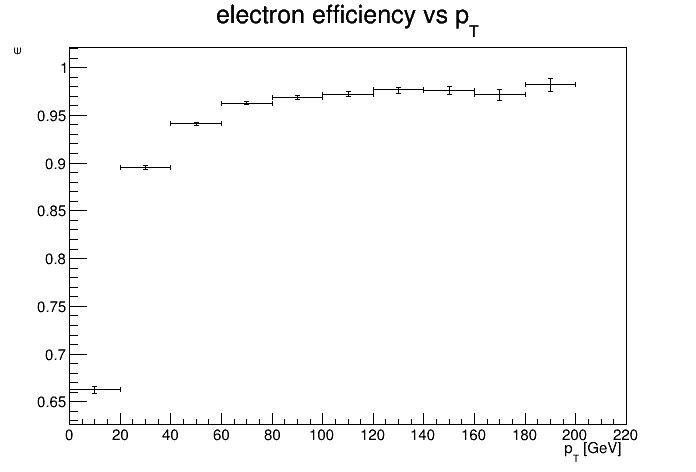

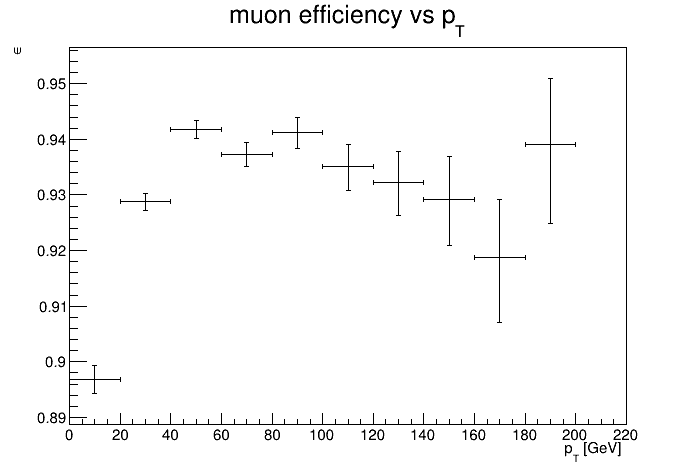

In [7]:
infile = open("efficiency.txt",'r')

eff_mu_pt = TEfficiency("muon_eff_vs_pt","muon efficiency vs p_{T}; p_{T} [GeV] ; #epsilon",10,0,200)
eff_el_pt = TEfficiency("elec_eff_vs_pt","electron efficiency vs p_{T}; p_{T} [GeV] ; #epsilon",10,0,200)


for line in infile:
    elements = line.split()
    pt = float(elements[0])/1000.
    eff = (float(elements[1]) > 0.5)
    
    if elements[2]=="electron": 
        eff_el_pt.Fill(eff,pt)
    elif elements[2]=="muon": 
        eff_mu_pt.Fill(eff,pt)


c1 = TCanvas()
c1.Draw()


eff_el_pt.Draw("AP")


c2=TCanvas()
eff_mu_pt.Draw()
c2.Draw()
